# `Time Series Analysis` 
### Section 05: Autocorrelation and Partial Autocorrelation.

#### `- Importing Libraries.`

In [151]:
# استيراد المكتبات
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# تفضيلات نمط التصوير البياني
plt.style.use('ggplot')

#### `01-Correlation` 

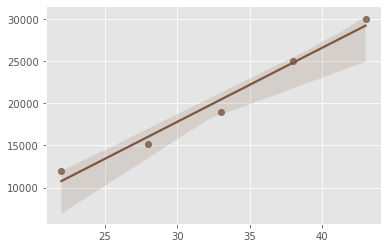

In [156]:
age = np.array([22, 28, 33, 38, 43])
salary = np.array([12000, 15200, 19000, 25000, 30000])    

sns.regplot(x=age, y=salary, color='#7F5741')
plt.show()

In [163]:
attributes_corr = np.corrcoef(age, salary)
pd.DataFrame(attributes_corr, columns={'age','salary'}, index={'age','salary'})

,salary,age
salary,1.000000,0.988386
age,0.988386,1.000000


#### `02- Shifted Time Series`

Revenues_00: [10000 12000 14000  8900  5000 10000 12000  7000  5900 15000 12000 13000]
Revenues_01: [12000 14000  8900  5000 10000 12000  7000  5900 15000 12000 13000]
Revenues_02: [14000  8900  5000 10000 12000  7000  5900 15000 12000 13000]


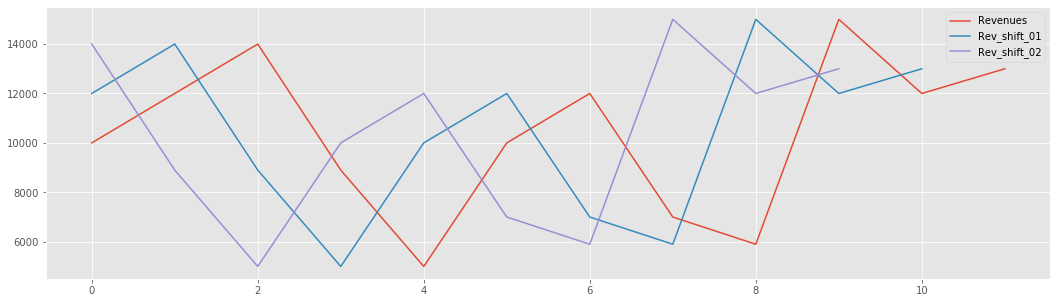

In [291]:
# إنشاء سلسلة زمنية و تأخيرها زمنياً 
Revenues = np.array([10000, 12000, 14000, 8900, 5000, 10000, 12000, 7000, 5900, 15000, 12000, 13000])
Revenues_shifted_1 = Revenues[1:]
Revenues_shifted_2 = Revenues[2:]
print(f"Revenues_00: {Revenues}\nRevenues_01: {Revenues_shifted_1}\nRevenues_02: {Revenues_shifted_2}")

# تصوير السلسلة ونظيراتها المتأخرة بيانيًا
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(Revenues)
ax.plot(Revenues_shifted_1)
ax.plot(Revenues_shifted_2)
ax.legend(['Revenues', 'Rev_shift_01', 'Rev_shift_02'])
plt.show()

#### `03- Finding Autocorrelation Manually`

In [293]:
# إيجاد الارتباط بين السلسلة الأصلية ونظيراتها المتأخرة

lag_0 = np.corrcoef(Revenues, Revenues)[0,1]
lag_1 = np.corrcoef(Revenues[:-1], Revenues_shifted_1)[0,1]
lag_2 = np.corrcoef(Revenues[:-2], Revenues_shifted_2)[0,1]

print(f"Lag 0: {lag_0}\nlag 1: {lag_1}\nlag 2: {lag_2}")


Lag 0: 1.0
lag 1: 0.09342343040046394
lag 2: -0.4621229967699638


#### `04- Using Statsmodels library to find autocorrelation` 

In [359]:
from statsmodels.graphics.tsaplots import acf, plot_acf
ac_values = np.round(acf(Revenues, nlags=5,  fft=False),2)
ac_values

array([ 1.  ,  0.09, -0.43, -0.01,  0.25, -0.21])

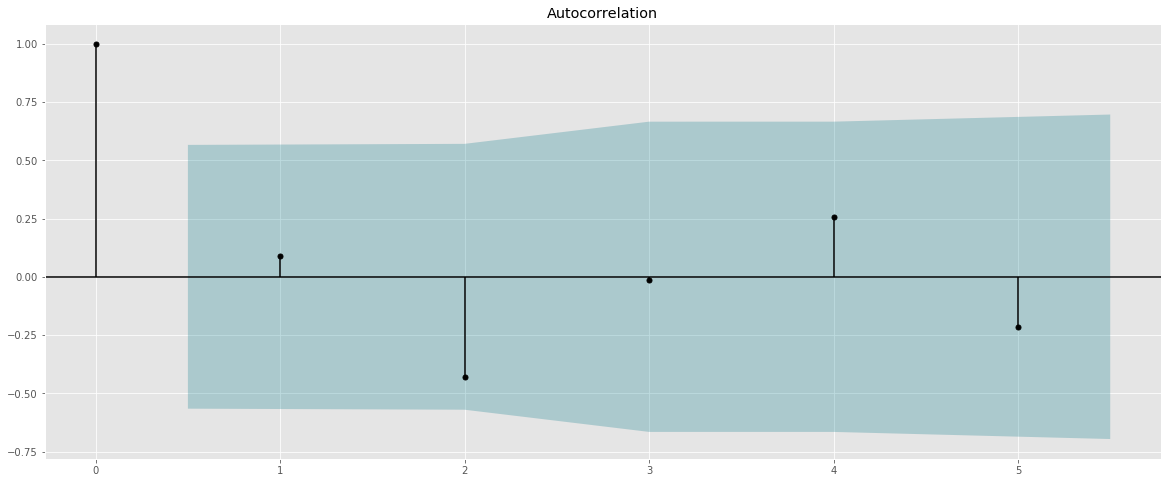

In [358]:
from matplotlib.collections import PolyCollection

fig, ax = plt.subplots(figsize=(20,8))
plot_acf(Revenues, ax=ax, lags=5, 
         color='#000000',  
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#007687')

plt.show()

#### `05-Autocorrelation on actual time series`

In [260]:
series = pd.read_csv('datasets/daily-minimum-temperatures.csv', index_col=0)
series.index = pd.to_datetime(series.index)
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


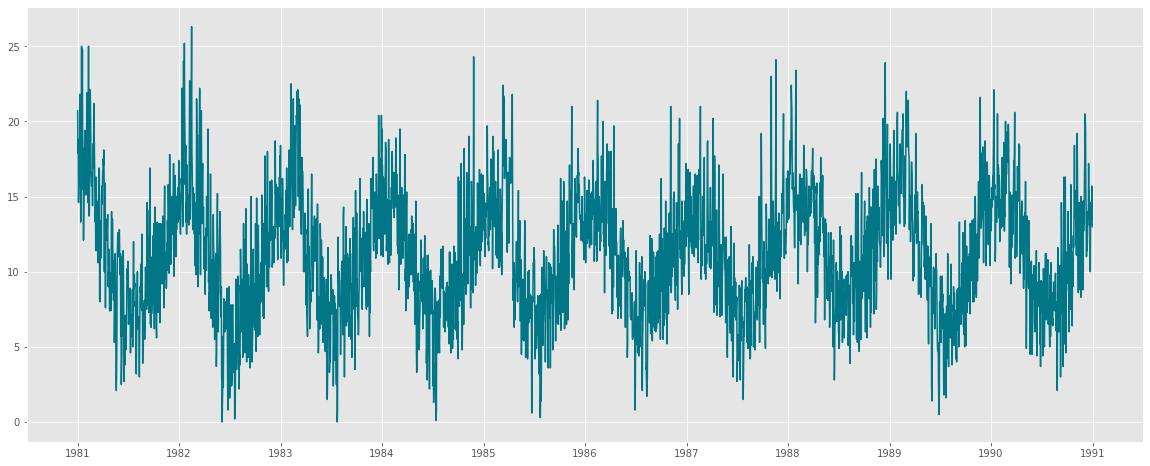

In [261]:
# الرسم البياني للسلسلة الزمنية
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(series, c='#007687');

In [146]:
import datetime as dt
import numpy as np
start = dt.datetime(1981,1,1)
end = dt.datetime(1981,1,7)
df_p = series.loc[start:end]

In [147]:
temps = df_p['Temp'].to_numpy()
day_i_temps = temps[1:]
day_i_minus_1 = temps[:-1]

np.corrcoef(day_i_minus_1, day_i_temps)


array([[1.        , 0.40664986],
       [0.40664986, 1.        ]])

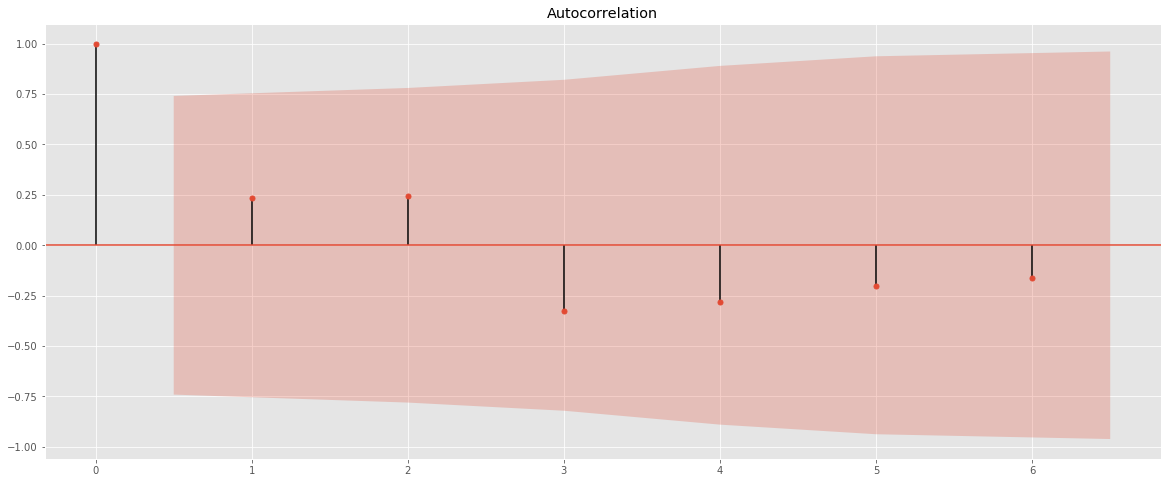

In [337]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(df_p, ax=ax)
plt.show()